In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [38]:
df = pd.read_csv("customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cdf = df[['CustomerID', 'Gender', 'Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']]

cdf['Gender_encoder'] = le.fit_transform(cdf['Gender'])
cdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encoder
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [40]:
cdf = cdf.drop('Gender',axis=1)

In [41]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Gender_encoder          200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [42]:
Z = cdf.values

In [43]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)


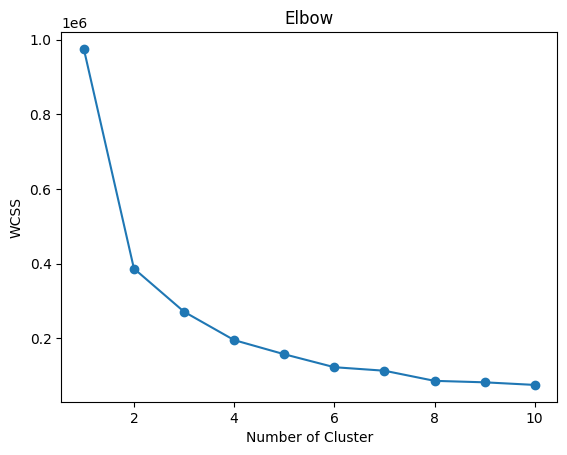

In [44]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('Elbow')
plt.show()


In [45]:
np.random.seed(0)

In [46]:
X , y = make_blobs(n_samples=5000, centers=[[4,4],[-2,-1],[2,-3],[1,1]], cluster_std=0.9)
print(X)
print(y)

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-1.69503125 -0.29979681]
 [-1.64362141  0.63035513]]
[1 2 2 ... 0 1 1]


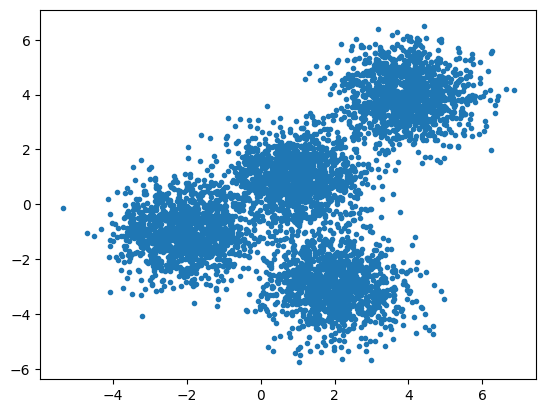

In [47]:
plt.scatter(X[:,0],X[:,1], marker='.')

In [48]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=15)

In [49]:
k_means.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,15
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [50]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], shape=(5000,), dtype=int32)

In [51]:
k_means_cluster_center = k_means.cluster_centers_
k_means_cluster_center

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

C:\Users\mehra\AppData\Local\Temp\ipykernel_4880\1701722831.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(my_cluster_center[0], my_cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', marker='.')


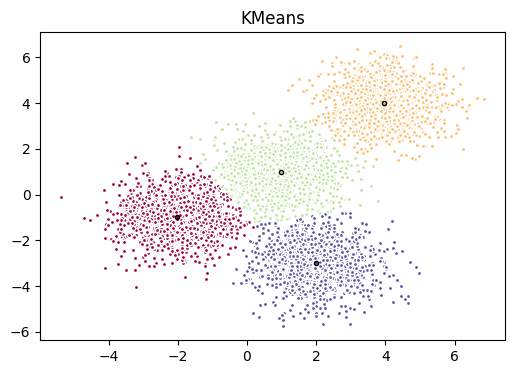

In [52]:
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral((np.linspace(0, 1, len(set(k_means_labels)))))
ax = fig.add_subplot(1,1,1)
for k , col in zip(range(len(k_means_cluster_center)), colors):
    my_memmbers = (k_means_labels==k)
    my_cluster_center = k_means_cluster_center[k]
    
    ax.plot(X[my_memmbers,0], X[my_memmbers,1],'w', markerfacecolor=col, marker='.')
    ax.plot(my_cluster_center[0], my_cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', marker='.')
    
ax.set_title('KMeans')

plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = cdf.values[:,1:]
X = np.nan_to_num(X)
cluster_data_set = ss.fit_transform(X)
cluster_data_set

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [54]:
Clusternum = 4
k_means = KMeans(init='k-means++',n_clusters=Clusternum,n_init=15)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 3 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [55]:
cdf['cluster_km'] = labels
cdf.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoder,cluster_km
0,1,19,15,39,1,3
1,2,21,15,81,1,3
2,3,20,16,6,0,2
3,4,23,16,77,0,3
4,5,31,17,40,0,2


In [56]:
cdf.groupby('cluster_km').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoder
cluster_km,,,,,
0,162.000000,40.394737,87.000000,18.631579,0.526316
1,162.000000,32.692308,86.538462,82.128205,0.461538
2,71.831579,44.894737,48.705263,42.631579,0.378947
3,28.642857,24.821429,28.714286,74.250000,0.500000


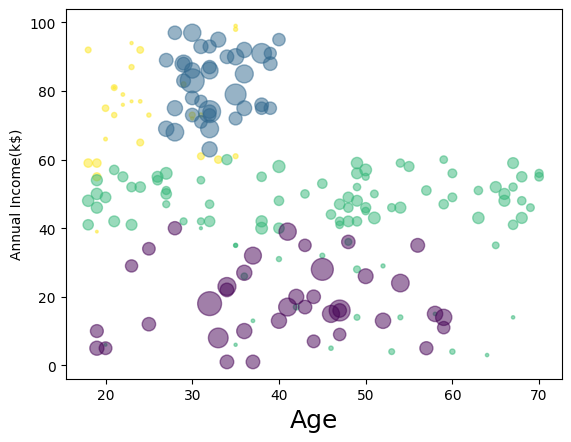

In [65]:
area = np.pi*(X[:,1])**2/200
plt.scatter(X[:,0] ,X[:,2] ,s=area , c=labels.astype(float) ,alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income(k$)',fontsize=10)
plt.show()